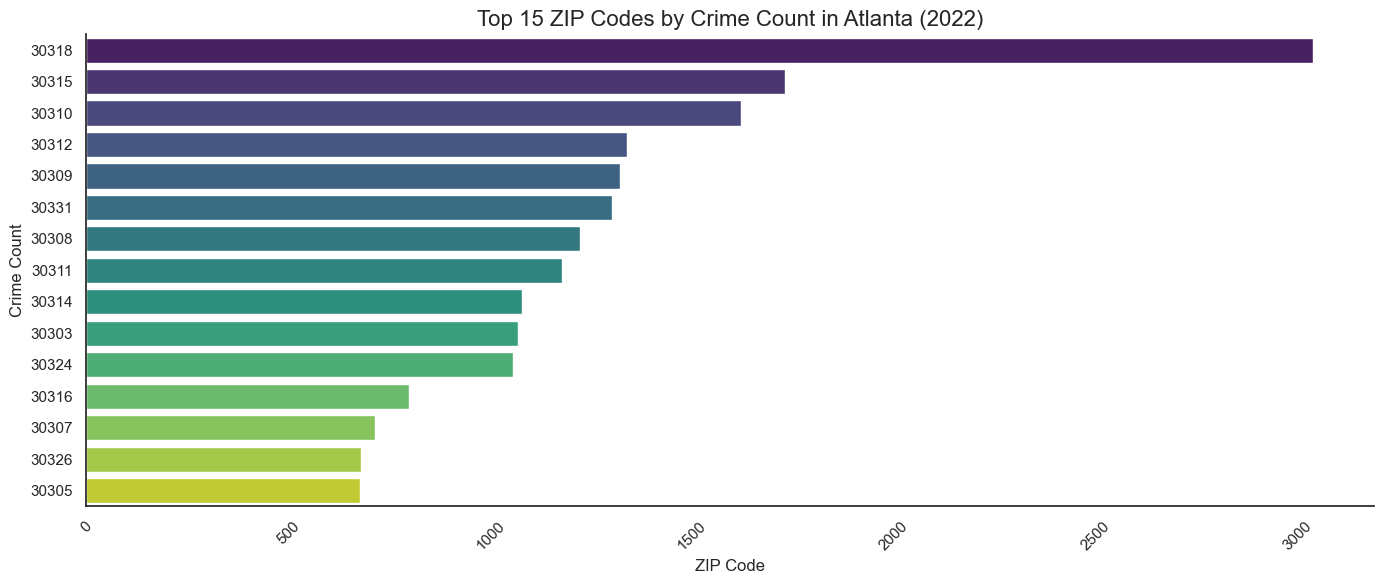

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
crime_df = pd.read_csv("COBRA-2022.csv")

# Extract ZIP codes
crime_df['zipcode'] = crime_df['location'].str.extract(r'\bGA\s+(\d{5})')

# Count crimes per ZIP code
zipcode_crime_counts = crime_df['zipcode'].value_counts().reset_index()
zipcode_crime_counts.columns = ['zipcode', 'crime_count']

# Top 15 ZIP codes
top_zipcodes = zipcode_crime_counts.head(15)

# Set style and figure size
sns.set_theme(style="white")
plt.figure(figsize=(14, 6))

# Use 'zipcode' as both x and hue, disable legend
sns.barplot(data=top_zipcodes, y='zipcode', x='crime_count', hue='zipcode', palette='viridis', legend=False)

# Titles and formatting
plt.title('Top 15 ZIP Codes by Crime Count in Atlanta (2022)', fontsize=16)
plt.xlabel('ZIP Code')
plt.ylabel('Crime Count')
plt.xticks(rotation=45)
sns.despine()

plt.tight_layout()
plt.show()
zipcode_crime_counts.to_csv("crime_counts.csv", index=False)




In [17]:
crime_df.columns.tolist()

['offense_id',
 'rpt_date',
 'occur_date',
 'occur_day',
 'occur_day_num',
 'occur_time',
 'poss_date',
 'poss_time',
 'beat',
 'zone',
 'location',
 'ibr_code',
 'UC2_Literal',
 'neighborhood',
 'npu',
 'lat',
 'long',
 'zipcode']

In [21]:
crime_df.describe()

,offense_id,occur_day_num,beat,zone,lat,long,occur_hour
count,2.157500e+04,21565.000000,21575.000000,21575.000000,21575.000000,21575.000000,21565.000000
mean,2.218665e+08,4.031022,382.638841,3.759490,33.759047,-84.403747,13.270577
std,5.452850e+06,2.038061,176.404360,1.768583,0.046734,0.044919,6.988152
min,2.201161e+07,1.000000,101.000000,1.000000,33.626118,-84.544953,0.000000
25%,2.210100e+08,2.000000,210.000000,2.000000,33.735444,-84.424513,8.000000
50%,2.219115e+08,4.000000,406.000000,4.000000,33.759735,-84.392616,15.000000
75%,2.227504e+08,6.000000,509.000000,5.000000,33.785515,-84.372074,19.000000
max,9.515853e+08,7.000000,707.000000,7.000000,33.884870,-84.290430,23.000000


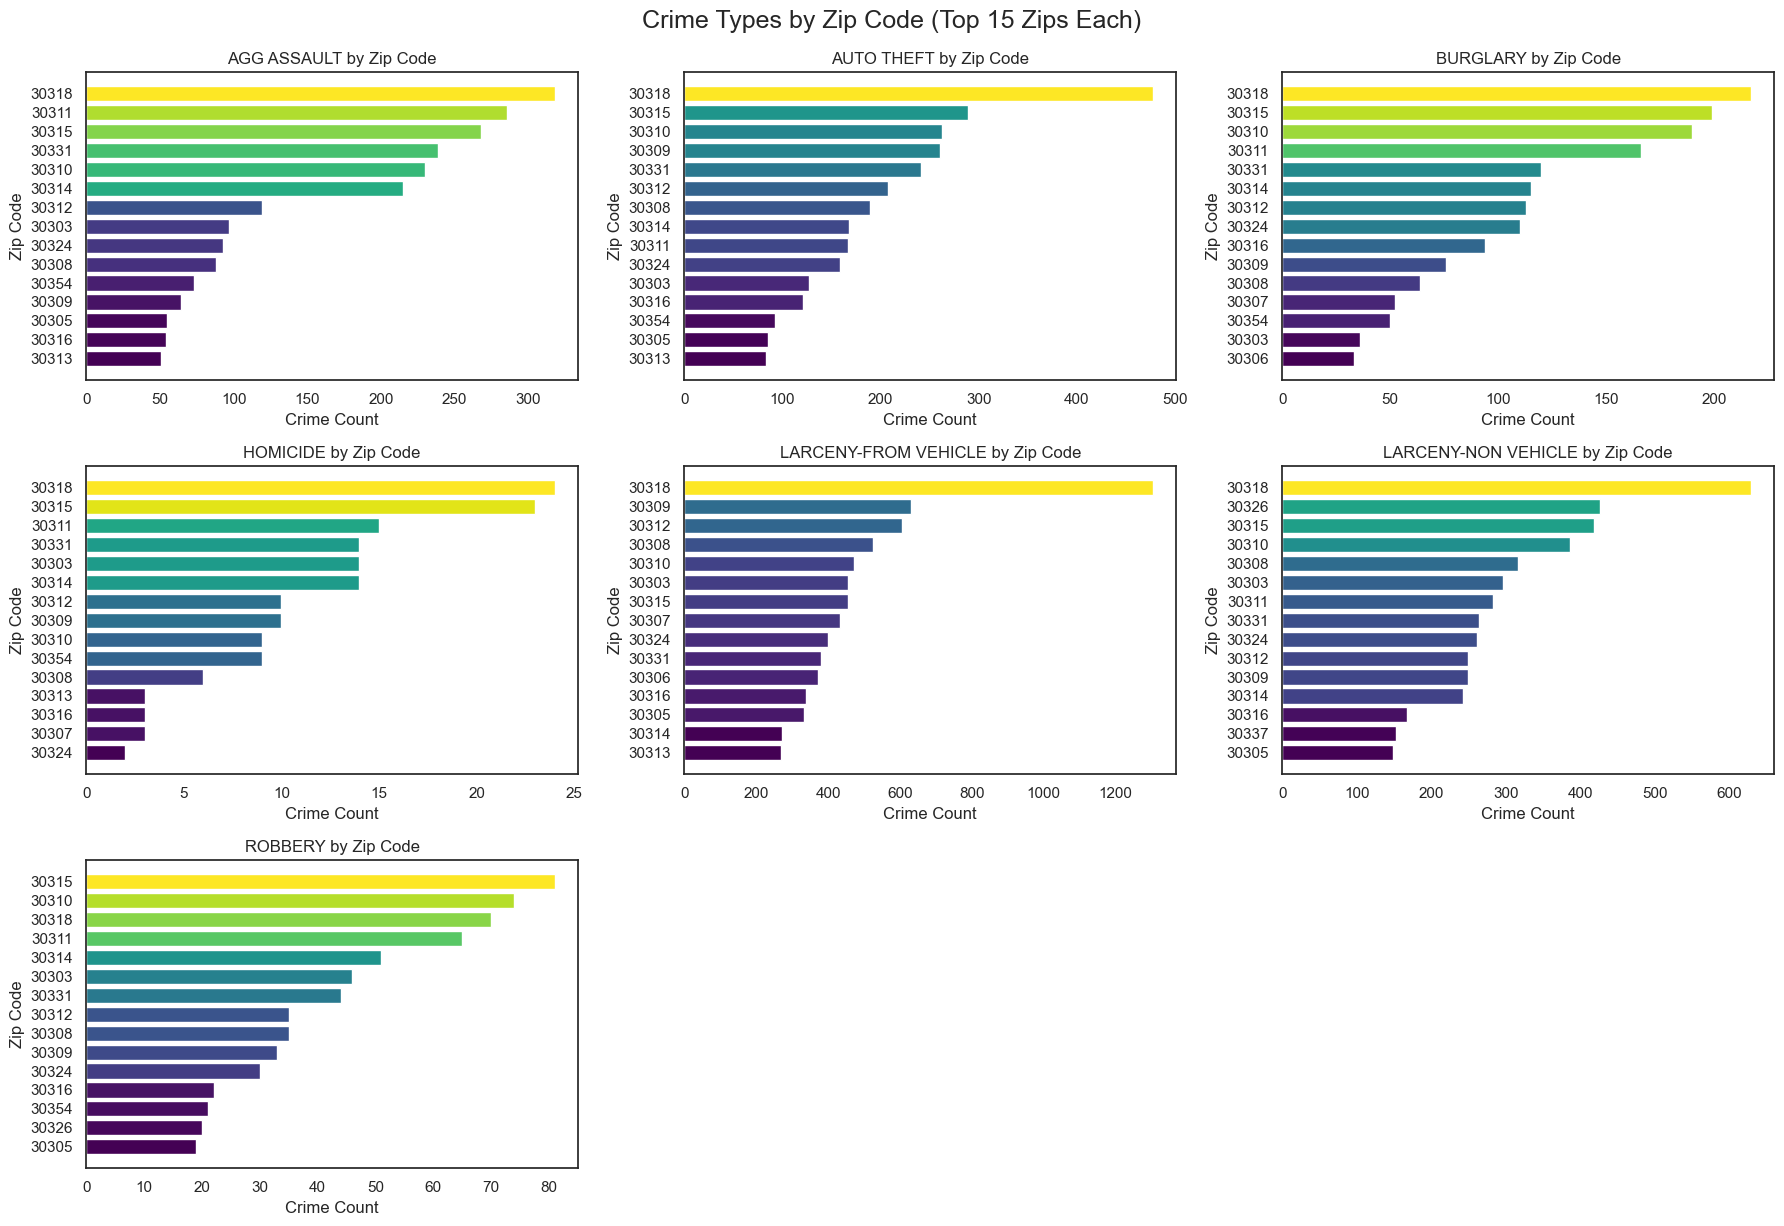

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Load your data
df = pd.read_csv('COBRA-2022.csv')

# Extract zip code from 'location'
df['zip_code'] = df['location'].str.extract(r'(\d{5})')

# Convert crime type to categorical
df['UC2_Literal'] = df['UC2_Literal'].astype('category')

# Get list of all crime types
crime_types = df['UC2_Literal'].cat.categories.tolist()

# Set subplot grid (3 columns per row)
cols = 3
rows = (len(crime_types) + cols - 1) // cols
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(18, rows * 4))
axes = axes.flatten()

for i, crime in enumerate(crime_types):
    ax = axes[i]
    df_crime = df[df['UC2_Literal'] == crime]
    zip_counts = df_crime['zip_code'].value_counts().head(15)

    # Sort for better visual consistency
    zip_counts = zip_counts.sort_values()

    # Normalize values for colormap scaling
    norm = mcolors.Normalize(vmin=zip_counts.min(), vmax=zip_counts.max())
    colors = cm.viridis(norm(zip_counts.values))  # Apply viridis to values

    # Draw horizontal bars with viridis color mapping
    ax.barh(zip_counts.index, zip_counts.values, color=colors)
    ax.set_title(f'{crime} by Zip Code')
    ax.set_xlabel('Crime Count')
    ax.set_ylabel('Zip Code')

# Remove any extra subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Crime Types by Zip Code (Top 15 Zips Each)', fontsize=18, y=1.02)
plt.show()



In [30]:
# Assuming you already have this from earlier
crime_df = pd.read_csv("crime_counts.csv")
print(crime_df.info())
price_df = pd.read_csv('zip_avg.csv')
print(price_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   zipcode      32 non-null     int64
 1   crime_count  32 non-null     int64
dtypes: int64(2)
memory usage: 644.0 bytes
None
     Unnamed: 0  RegionName  1/31/2022  2/28/2022  3/31/2022  4/30/2022  \
0             0     30101.0   394262.0   402691.0   413677.0   422604.0   
1             1     30102.0   339024.0   346569.0   354793.0   362075.0   
2             2     30103.0   241944.0   246990.0   251456.0   256172.0   
3             3     30005.0   631851.0   648160.0   661735.0   678134.0   
4             4     30009.0   590272.0   604980.0   615806.0   629494.0   
..          ...         ...        ...        ...        ...        ...   
196         196     30184.0   340251.0   347157.0   354109.0   360271.0   
197         197     30217.0   182801.0   187964.0   190033.0   192460.0   
198         198

In [31]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency = pd.crosstab(crime_df['zipcode'], crime_df['crime_count'])

# Run chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)
# Print the results
print("\nChi-Square Test Results:")
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p:.4f}")



Chi-Square Test Results:
Chi2 Statistic: 896.0000
Degrees of Freedom: 868
P-value: 0.2480


In [32]:
from scipy.stats import spearmanr

# Perform Pearson correlation
correlation, p_value = spearmanr(crime_df['crime_count'], crime_df['zipcode'])


# Print the result
print(f"Spearman correlation coefficient: {correlation:.3f}")
print(f"P-value: {p_value:.5f}")

Spearman correlation coefficient: -0.563
P-value: 0.00079


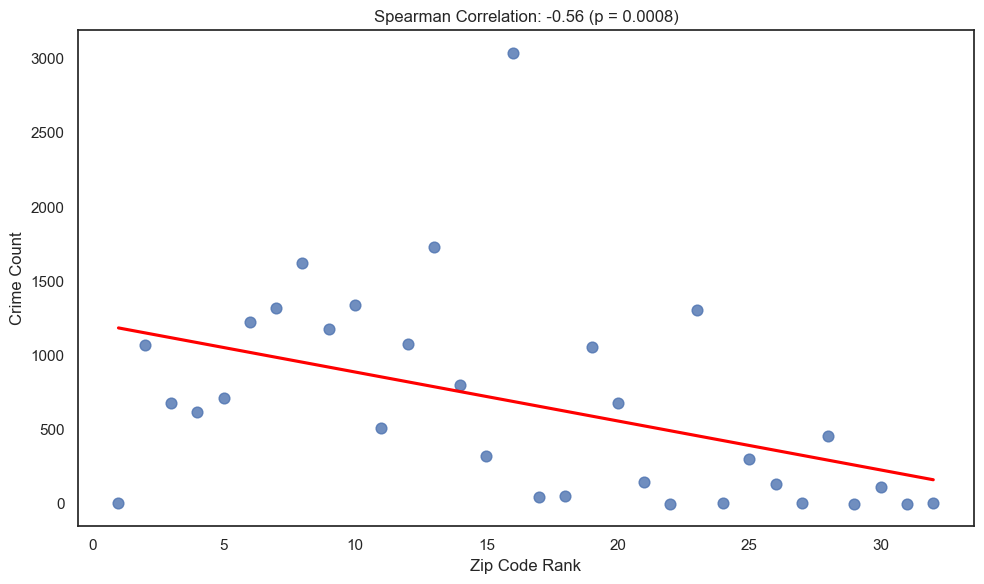

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import spearmanr

# Rank zip codes numerically
crime_df['zip_rank'] = crime_df['zipcode'].rank(method='dense')

# Calculate Spearman correlation
corr, p_val = spearmanr(crime_df['zip_rank'], crime_df['crime_count'])

# Scatter plot of zip rank vs crime count
plt.figure(figsize=(10, 6))
sns.regplot(
    x='zip_rank', 
    y='crime_count', 
    data=crime_df, 
    ci=None,        # remove confidence interval
    scatter_kws={"s": 60},  # size of points
    line_kws={"color": "red"}  # line color
)

plt.title(f"Spearman Correlation: {corr:.2f} (p = {p_val:.4f})")
plt.xlabel("Zip Code Rank")
plt.ylabel("Crime Count")
plt.tight_layout()
plt.show()

In [34]:
# Select only the relevant columns and rename RegionName to match 'zipcode'
price_df = price_df[['RegionName', 'Average2022']].rename(columns={'RegionName': 'zipcode'})

# Merge using outer join to keep all ZIP codes
crime_price_df = pd.merge(crime_df, price_df, on='zipcode', how='left')
crime_price_df.head(5)


,zipcode,crime_count,zip_rank,Average2022
0,30318,3038,16.0,395594.083333
1,30315,1731,13.0,287388.166667
2,30310,1622,8.0,363522.583333
3,30312,1339,10.0,580055.000000
4,30309,1322,7.0,951724.000000


In [35]:
crime_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   zipcode      32 non-null     int64  
 1   crime_count  32 non-null     int64  
 2   zip_rank     32 non-null     float64
 3   Average2022  24 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.1 KB


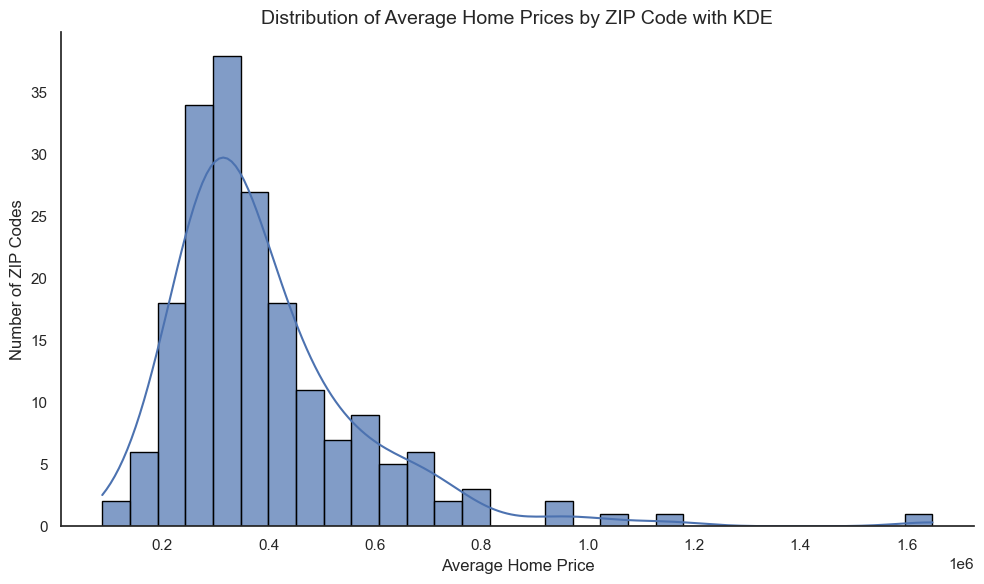

In [36]:
price_data = price_df['Average2022'].dropna()

plt.figure(figsize=(10, 6))

sns.histplot(
    price_data,
    bins=30,                  # Number of bins (you can tweak this)
    kde=True,                 # Enable KDE line
    edgecolor='black',        # Black borders on bars
    alpha=0.7                 # Slight transparency for style
)

plt.title('Distribution of Average Home Prices by ZIP Code with KDE', fontsize=14)
plt.xlabel('Average Home Price', fontsize=12)
plt.ylabel('Number of ZIP Codes', fontsize=12)
plt.tight_layout()
sns.despine()
plt.show()

In [37]:
from scipy.stats import pearsonr

plot_data = crime_price_df.dropna(subset=['crime_count', 'Average2022'])

# Perform Pearson correlation
correlation, p_value = pearsonr(plot_data['crime_count'], plot_data['Average2022'])


# Print the result
print(f"Pearson correlation coefficient: {correlation:.3f}")
print(f"P-value: {p_value:.5f}")

Pearson correlation coefficient: -0.248
P-value: 0.24187


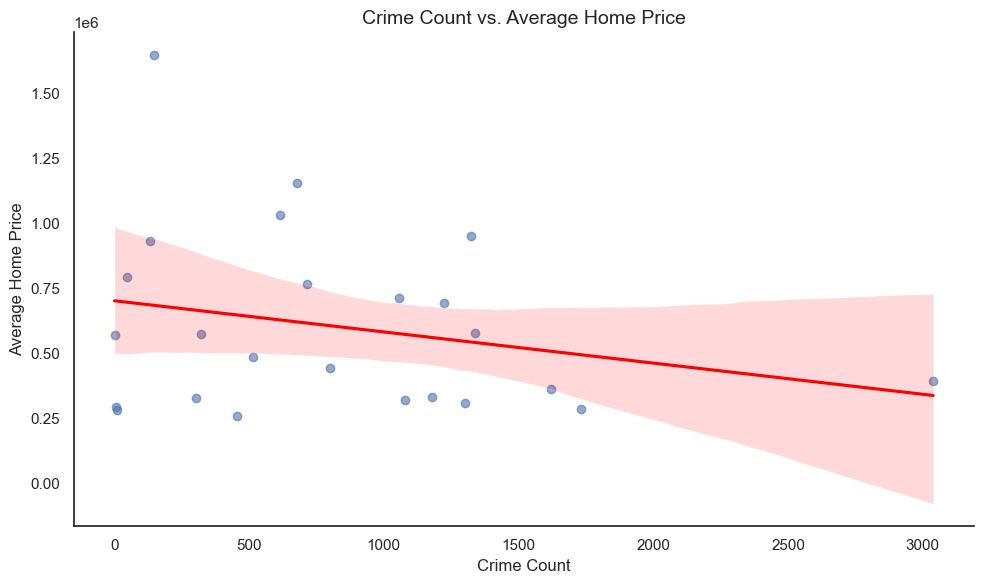

In [38]:

sns.set_theme(style='white')
plt.figure(figsize=(10, 6))

sns.regplot(
    data=crime_price_df,
    x='crime_count',
    y='Average2022',
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'}
)

plt.title('Crime Count vs. Average Home Price', fontsize=14)
plt.xlabel('Crime Count')
plt.ylabel('Average Home Price')
plt.tight_layout()
sns.despine()
plt.show()
